In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pickle

In [2]:
# !echo '{"username":"paritoshtripathi","key":"2b50a9924984f4ae26c074bad5f41bc4"}' > kaggle.json
# !kaggle datasets download -d colearninglounge/predicting-pulsar-starintermediate
# use this to download the dataset

In [3]:
# !unzip predicting-pulsar-starintermediate.zip

In [4]:
train = pd.read_csv("pulsar_data_train.csv")
test = pd.read_csv("pulsar_data_test.csv")

In [5]:
train.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [6]:
print(train.head(10))
print(train.tail(10))

print(train.shape)
print(train.dtypes)

    Mean of the integrated profile  \
0                       121.156250   
1                        76.968750   
2                       130.585938   
3                       156.398438   
4                        84.804688   
5                       121.007812   
6                        79.343750   
7                       109.406250   
8                        95.007812   
9                       109.156250   

    Standard deviation of the integrated profile  \
0                                      48.372971   
1                                      36.175557   
2                                      53.229534   
3                                      48.865942   
4                                      36.117659   
5                                      47.176944   
6                                      42.402174   
7                                      55.912521   
8                                      40.219805   
9                                      47.002234   

    Exce

In [7]:
train.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [8]:
train.columns = train.columns.str.strip()
test.columns = test.columns.str.strip()

In [9]:
train.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [10]:
# Checking for missing values
def data_processing(df):
    df = df.dropna()
    df = df.drop_duplicates()
    df = pd.get_dummies(df, drop_first=True)
    
    scaler = StandardScaler()
    df['Mean of the integrated profile'] = scaler.fit_transform(df[['Mean of the integrated profile']])
    df['Standard deviation of the integrated profile'] = scaler.fit_transform(df[['Standard deviation of the integrated profile']])
    df['Excess kurtosis of the integrated profile'] = scaler.fit_transform(df[['Excess kurtosis of the integrated profile']])
    df['Skewness of the integrated profile'] = scaler.fit_transform(df[['Skewness of the integrated profile']])
    df['Mean of the DM-SNR curve'] = scaler.fit_transform(df[['Mean of the DM-SNR curve']])
    df['Standard deviation of the DM-SNR curve'] = scaler.fit_transform(df[['Standard deviation of the DM-SNR curve']])
    df['Excess kurtosis of the DM-SNR curve'] = scaler.fit_transform(df[['Excess kurtosis of the DM-SNR curve']])
    df['Skewness of the DM-SNR curve'] = scaler.fit_transform(df[['Skewness of the DM-SNR curve']])

    # check for outliers using boxplot
    sns.boxplot(x=df['Mean of the integrated profile'])
    plt.show()
    sns.boxplot(x=df['Standard deviation of the integrated profile'])
    plt.show()
    sns.boxplot(x=df['Excess kurtosis of the integrated profile'])
    plt.show()
    sns.boxplot(x=df['Skewness of the integrated profile'])
    plt.show()
    sns.boxplot(x=df['Mean of the DM-SNR curve'])
    plt.show()
    sns.boxplot(x=df['Standard deviation of the DM-SNR curve'])
    plt.show()
    sns.boxplot(x=df['Excess kurtosis of the DM-SNR curve'])
    plt.show()
    sns.boxplot(x=df['Skewness of the DM-SNR curve'])
    plt.show()
    
    return df


In [11]:
def svm_train(df):
    X = df.drop('target_class', axis=1)
    y = df['target_class']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # a) SVM with Default parameter means C=1.0, kernel=rbf and gamma=auto among other parameters)
    clf = SVC()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy of SVM with Default parameter means C=1.0, kernel=rbf and gamma=auto among other parameters) is: ", accuracy_score(y_test, y_pred))
    
    # b) SVM with rbf kernel and C=100.0
    clf = SVC(C=100.0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy of SVM with rbf kernel and C=100.0 is: ", accuracy_score(y_test, y_pred))

    # c) SVM with rbf kernel and C=1000.0
    clf = SVC(C=1000.0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy of SVM with rbf kernel and C=1000.0 is: ", accuracy_score(y_test, y_pred))

    # d) SVM with linear kernel and C=1.0
    clf = SVC(kernel='linear', C=1.0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print("Accuracy of SVM with linear kernel and C=1.0 is: ", accuracy_score(y_test, y_pred))

    # e) SVM with linear kernel and C=100.0
    clf = SVC(kernel='linear', C=100.0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy of SVM with linear kernel and C=100.0 is: ", accuracy_score(y_test, y_pred))

    # f) SVM with linear kernel and C=1000.0
    clf = SVC(kernel='linear', C=1000.0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy of SVM with linear kernel and C=1000.0 is: ", accuracy_score(y_test, y_pred))

    # g) Choose option b and e with gamma =100
    clf = SVC(C=100.0, gamma=100)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy of SVM with rbf kernel and C=100.0 and gamma=100 is: ", accuracy_score(y_test, y_pred))
    
    # h) Choose option c and f with gamma =1000
    clf = SVC(kernel='linear', C=100.0, gamma=100)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy of SVM with linear kernel and C=100.0 and gamma=100 is: ", accuracy_score(y_test, y_pred))
    
    # plot the margin lines
    plt.figure(figsize=(10, 10))
    plt.scatter(X_train['Mean of the integrated profile'], X_train['Standard deviation of the integrated profile'], c=y_train, s=30, cmap=plt.cm.Paired)
    plt.xlabel('Mean of the integrated profile')
    plt.ylabel('Standard deviation of the integrated profile')
    plt.show()
    
    pickle.dump(clf, open('model.pkl', 'wb'))
    return df

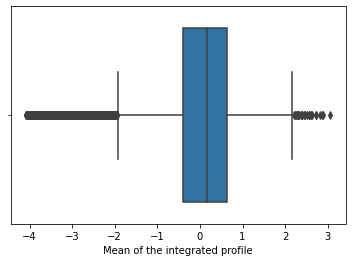

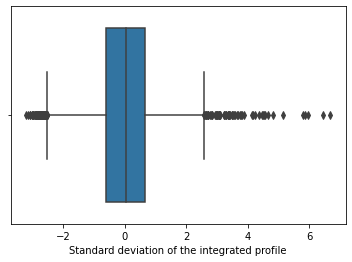

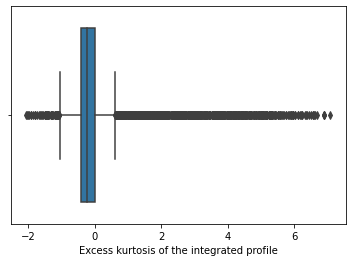

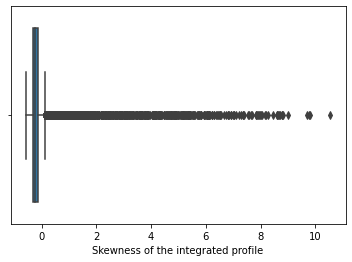

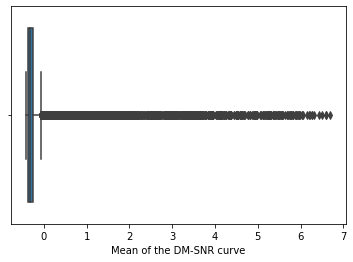

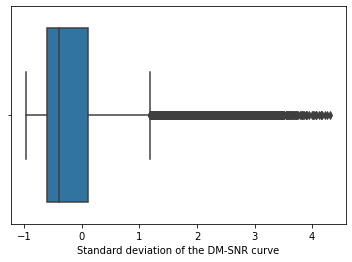

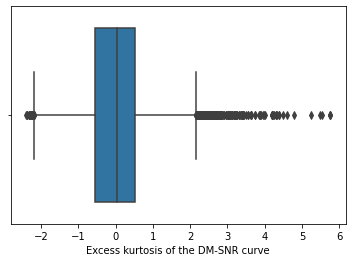

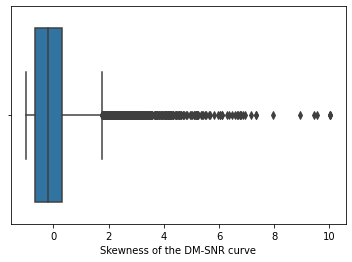

In [12]:
df = data_processing(train)

Accuracy of SVM with Default parameter means C=1.0, kernel=rbf and gamma=auto among other parameters) is:  0.9800539083557952
Accuracy of SVM with rbf kernel and C=100.0 is:  0.9778975741239893
Accuracy of SVM with rbf kernel and C=1000.0 is:  0.9752021563342318
Accuracy of SVM with linear kernel and C=1.0 is:  0.9800539083557952
Accuracy of SVM with linear kernel and C=100.0 is:  0.9811320754716981
Accuracy of SVM with linear kernel and C=1000.0 is:  0.9811320754716981
Accuracy of SVM with rbf kernel and C=100.0 and gamma=100 is:  0.9121293800539083
Accuracy of SVM with linear kernel and C=100.0 and gamma=100 is:  0.9811320754716981


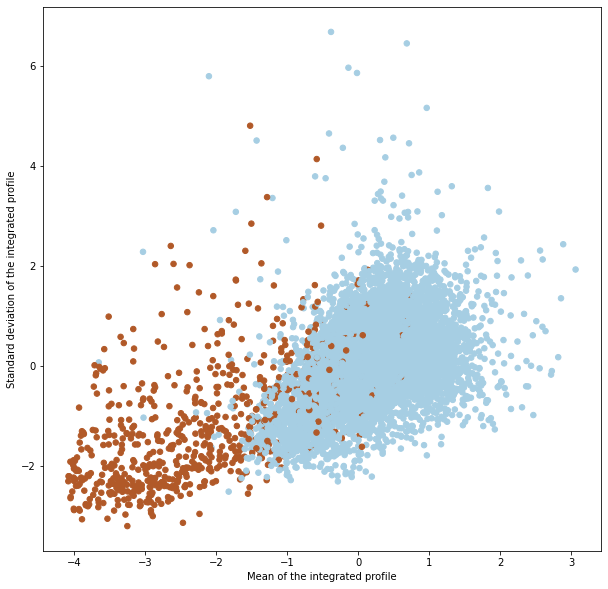

In [13]:
model_traning = svm_train(df)

In [14]:
test = test.fillna(0)

In [15]:
test

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405,0.0
1,75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791,0.0
2,103.273438,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134941,0.0
3,101.078125,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904,0.0
4,113.226562,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268,0.0
...,...,...,...,...,...,...,...,...,...
5365,116.531250,51.140269,-0.001220,-0.184189,4.510870,26.599514,6.634989,45.362390,0.0
5366,114.976562,53.783052,0.377599,-0.155708,2.772575,20.838488,8.440796,77.355028,0.0
5367,136.171875,48.924385,0.000000,0.063227,2.810201,18.695230,7.848577,69.388978,0.0
5368,106.500000,49.066122,0.245742,0.140377,2.331104,15.417568,9.008041,100.367616,0.0


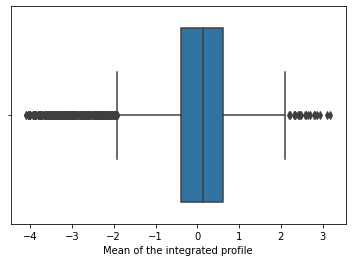

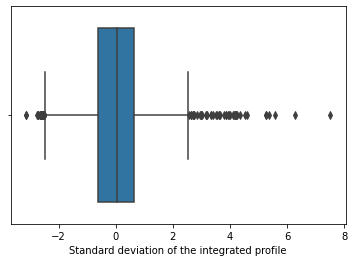

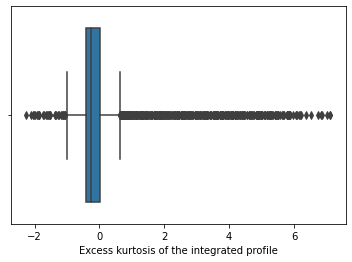

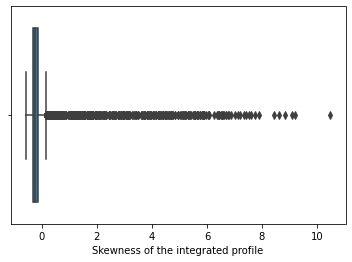

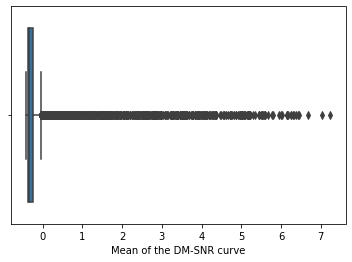

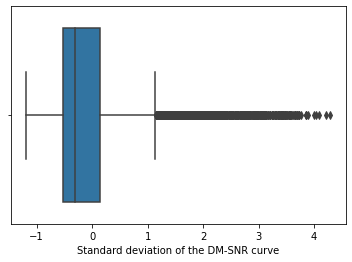

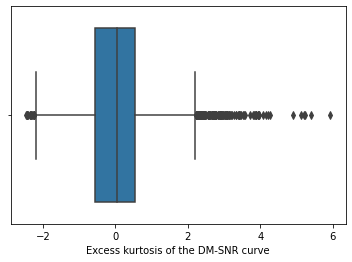

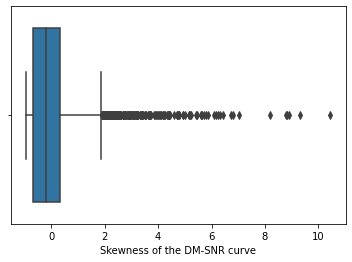

Accuracy of SVM with linear kernel and C=100.0 and gamma=100 is:  0.9288640595903166
[0. 1. 0. ... 0. 0. 0.]


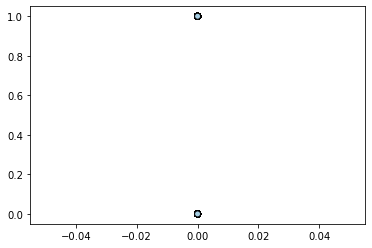

In [16]:
def load_model():
    model = pickle.load(open('model.pkl', 'rb'))
    return model

# predict the output
def predict(model, X_test):
    y_pred = model.predict(X_test)
    return y_pred

# main function
if __name__ == '__main__':
    df = data_processing(test)
    model = load_model()
    X = df.drop('target_class', axis=1)
    y = df['target_class']
    y_pred = predict(model, X)
    plt.scatter(y, y_pred, c=y, cmap=plt.cm.Paired, edgecolors="k")
    print("Accuracy of SVM with linear kernel and C=100.0 and gamma=100 is: ", accuracy_score(y, y_pred))
    print(y_pred)
